             preco_ultimo_negocio
data_pregao                      
2018-10-18                  25.22
2018-10-19                  26.00
2018-10-22                  27.34
2018-10-23                  25.50
2018-10-24                  25.62


<function matplotlib.pyplot.show(close=None, block=None)>

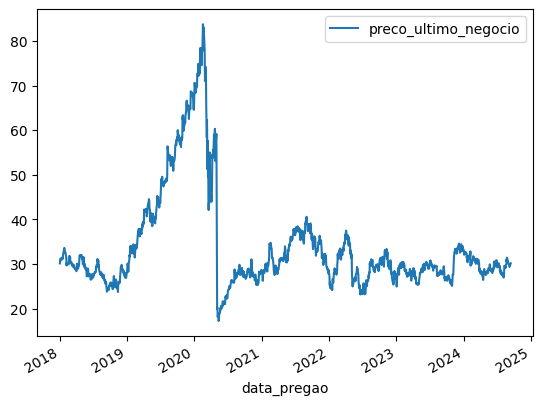

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

data = pd.read_csv('./dataset/dados_pregao_tots3.csv', header=0, parse_dates=True, index_col=0)
df = data[['preco_ultimo_negocio']]
print(df.head())
df.plot()
pyplot.show

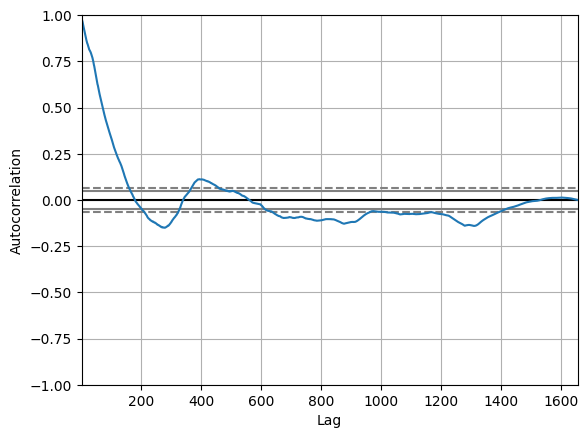

In [40]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
pyplot.show()

In [41]:
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

In [31]:
stepwise_fit = auto_arima(df['preco_ultimo_negocio'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6964.878, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7177.993, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7016.200, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6975.081, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7175.993, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6978.098, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6973.142, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6955.409, Time=0.79 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6957.500, Time=0.64 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=6953.900, Time=1.01 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=6952.616, Time=0.59 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=6950.712, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6966.908, Time=0.18 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=6952.653, Time=0.35 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept

predicted=28.900599, expected=28.510000
predicted=28.688617, expected=27.810000
predicted=28.168828, expected=27.950000
predicted=28.053424, expected=27.880000
predicted=27.867723, expected=26.300000
predicted=26.813530, expected=27.070000
predicted=27.080235, expected=27.250000
predicted=27.114716, expected=27.610000
predicted=27.246031, expected=27.820000
predicted=27.751984, expected=28.580000
predicted=28.266324, expected=28.160000
predicted=28.209836, expected=28.180000
predicted=28.232880, expected=29.120000
predicted=28.869547, expected=28.400000
predicted=28.456098, expected=27.240000
predicted=27.751016, expected=27.250000
predicted=27.579744, expected=28.200000
predicted=27.827247, expected=28.400000
predicted=28.039212, expected=26.680000
predicted=27.234499, expected=26.750000
predicted=27.114926, expected=27.120000
predicted=27.072075, expected=26.450000
predicted=26.448524, expected=25.550000
predicted=25.988023, expected=25.670000
predicted=25.852629, expected=25.800000


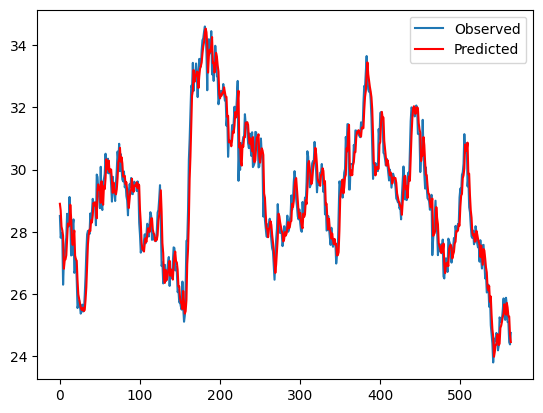

In [49]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]

    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(test, label='Observed')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()
